In [ ]:
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# Using the normal equation to create a closed form solution to finding parameters that minimize a cost function

import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1);

X_b = np.c_[np.ones((100, 1)), X];
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y);

print(theta_best);

[[4.21509616]
 [2.77011339]]


In [ ]:
# making predictions using these parameters

X_new = np.array([[0], [2]]);
X_new_b = np.c_[np.ones((2, 1)), X_new];
y_predict = X_new_b.dot(theta_best);
print(y_predict);

[[4.21509616]
 [9.75532293]]


(-0.1, 2.1, 2.8477454677318, 11.434711713953867)

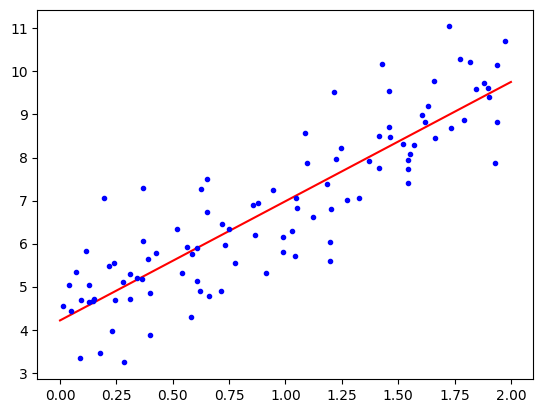

In [ ]:


# plotting our model's predictions
plt.plot(X_new, y_predict, "r-");
plt.plot(X, y, "b.");
plt.axis()



In [ ]:
# Perform LinearRegression using SciKitLearn

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression();
lin_reg.fit(X, y);
print("Intercept: (", lin_reg.intercept_, ") Coef: (", lin_reg.coef_, ")");
print("Prediction: (", lin_reg.predict(X_new), ")");

Intercept: ( [4.21509616] ) Coef: ( [[2.77011339]] )
Prediction: ( [[4.21509616]
 [9.75532293]] )


In [ ]:
# Calculating gradient descent

eta = 0.1 #learning step
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1); #random initialization

for iteration in range(n_iterations):
  gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y);
  theta = theta - eta * gradients

print("T: (", theta, ")");

T: ( [[4.21509616]
 [2.77011339]] )


In [ ]:
# creating Stochastic Gradient Descent model in SciKitLearn

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1);
sgd_reg.fit(X, y.ravel());
print("Intercept: (", sgd_reg.intercept_, ") Coef: (", sgd_reg.coef_, ")");
print("Prediction: (", sgd_reg.predict(X_new), ")");

Intercept: ( [4.21731217] ) Coef: ( [2.76060865] )
Prediction: ( [4.21731217 9.73852946] )


In [ ]:
# Create some nonlinear data so we can focus on using Polynomial regressors
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 + X**2 + X + 2 + np.random.randn(m, 1);

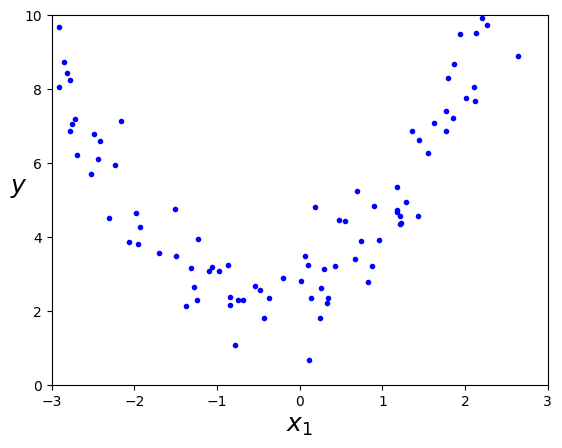

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
# add powers to each feature in order to work with nonlinear data

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False);
X_poly = poly_features.fit_transform(X);
print(X[0]);
X_poly[0]

[0.87283378]


array([0.87283378, 0.7618388 ])

In [ ]:
lin_reg = LinearRegression();
lin_reg.fit(X_poly, y);
lin_reg.intercept_, lin_reg.coef_

(array([2.57420083]), array([[0.88540576, 0.9768815 ]]))

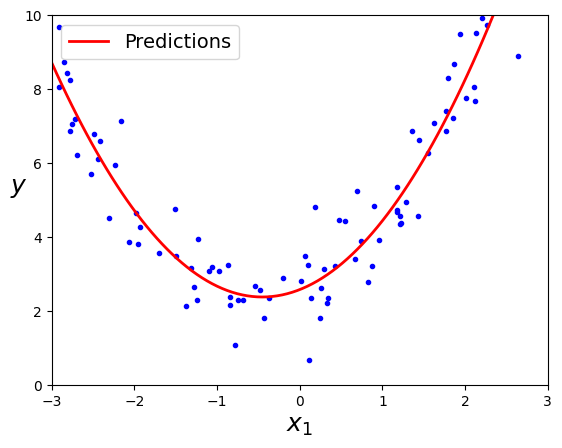

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
# If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting
# If a model performs poorly on both, then it is underfitting


In [ ]:
# regularlize a model with Ridge regresion with a closed form solution
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y);
print(ridge_reg.predict([[1.5]]));

[[6.94393872]]


In [ ]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel());
print(sgd_reg.predict([[1.5]]));

[6.93562885]


In [ ]:
# import the Lasso class
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1);
lasso_reg.fit(X, y);
print(lasso_reg.predict([[1.5]]));

[6.90415392]


In [ ]:
# Use the ElasticNet
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y);
print(elastic_net.predict([[1.5]]));

[6.90816087]


In [ ]:
# build logistic regression model and plot the results
from sklearn import datasets
iris = datasets.load_iris();
print(list(iris.keys()));

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [ ]:
X = iris["data"][:, 3:];
y = (iris["target"] == 2).astype(np.int);

<ipython-input-37-9196f76714e2>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int);


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression();
log_reg.fit(X, y);

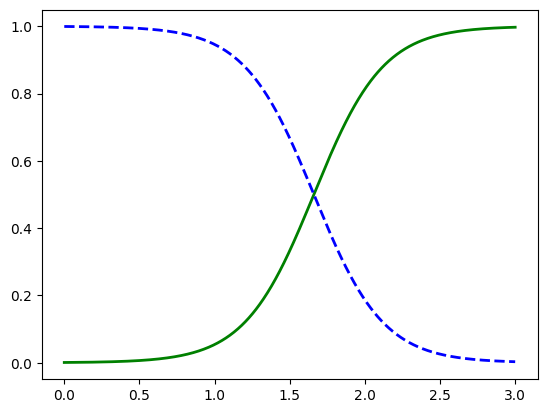

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

In [ ]:
# has a decision boundary at about 1.6
print(log_reg.predict([[1.7], [1.5]]))

[1 0]


In [ ]:
# Use a SoftMax regressive model for multinomial logistic regression
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10);
softmax_reg.fit(X, y);

print(softmax_reg.predict([[5, 2]]));

[2]
